In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
df= pd.read_csv('aug_train.csv')

In [3]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


### DEALING WITH NULLS

In [4]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [5]:
df[df.isnull()['company_type']]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
10,29452,city_21,0.624,NaN,No relevent experience,Full time course,High School,NaN,2,NaN,NaN,never,32,1.0
13,5826,city_21,0.624,Male,No relevent experience,NaN,NaN,NaN,2,NaN,NaN,never,24,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19144,17191,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,never,48,1.0
19151,11385,city_149,0.689,Male,No relevent experience,Full time course,Graduate,NaN,2,NaN,NaN,1,60,0.0
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0


In [6]:
df['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [7]:
df['company_type'].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [8]:
df[df.isnull()['last_new_job']]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
58,13478,city_21,0.624,NaN,Has relevent experience,Full time course,Graduate,STEM,2,10/49,Funded Startup,NaN,32,1.0
64,9572,city_11,0.550,NaN,No relevent experience,Full time course,High School,NaN,3,NaN,NaN,NaN,98,0.0
90,19128,city_61,0.913,Male,No relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,NaN,140,0.0
135,23947,city_103,0.920,NaN,No relevent experience,no_enrollment,Phd,STEM,NaN,NaN,NaN,NaN,70,0.0
180,27708,city_94,0.698,Male,No relevent experience,Full time course,Graduate,STEM,5,5000-9999,NaN,NaN,24,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18944,2678,city_104,0.924,NaN,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,NaN,27,0.0
19043,17966,city_114,0.926,NaN,No relevent experience,Full time course,High School,NaN,3,NaN,NaN,NaN,20,0.0
19106,18131,city_100,0.887,Male,No relevent experience,Full time course,Masters,STEM,6,100-500,Public Sector,NaN,8,0.0
19113,11622,city_19,0.682,NaN,No relevent experience,Full time course,Graduate,STEM,6,NaN,NaN,NaN,53,0.0


In [9]:
from sklearn.impute import SimpleImputer

In [10]:
index_list=[]
index_list.append(list(df[df['relevent_experience']=='No relevent experience']['company_size'].index))

In [11]:
impute= SimpleImputer(strategy='constant', fill_value='Not Available')

In [12]:
val= list(impute.fit_transform(np.array(df[df['relevent_experience']=='No relevent experience']['company_size']).reshape(len(df[df['relevent_experience']=='No relevent experience']['company_size']), 1)).reshape(len(df[df['relevent_experience']=='No relevent experience']['company_size'])))

In [13]:
for i in tqdm(range(len(index_list[0]))):
    df.loc[index_list[0][i], 'company_size']= val[i]

100%|██████████| 5366/5366 [00:00<00:00, 16204.67it/s]


In [14]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              2581
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [15]:
val= list(impute.fit_transform(np.array(df[df['relevent_experience']=='No relevent experience']['company_type']).reshape(len(df[df['relevent_experience']=='No relevent experience']['company_type']), 1)).reshape(len(df[df['relevent_experience']=='No relevent experience']['company_type'])))

In [16]:
index_list=[]
index_list.append(list(df[df['relevent_experience']=='No relevent experience']['company_type'].index))


In [17]:
for i in tqdm(range(len(index_list[0]))):
    df.loc[index_list[0][i], 'company_type']= val[i]

100%|██████████| 5366/5366 [00:00<00:00, 15572.06it/s]


In [18]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              2581
company_type              2977
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [19]:
df['gender']=  df['gender'].fillna('Not Available')

In [20]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              2581
company_type              2977
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [21]:
impute=SimpleImputer(strategy='constant',fill_value='never' )

In [22]:
val= list(impute.fit_transform(np.array(df[df['relevent_experience']=='No relevent experience']['last_new_job']).reshape(len(df[df['relevent_experience']=='No relevent experience']['last_new_job']), 1)).reshape(len(df[df['relevent_experience']=='No relevent experience']['last_new_job'])))

In [23]:
index_list=[]
index_list.append(list(df[df['relevent_experience']=='No relevent experience']['last_new_job'].index))


In [24]:
for i in tqdm(range(len(index_list[0]))):
    df.loc[index_list[0][i], 'last_new_job']= val[i]

100%|██████████| 5366/5366 [00:00<00:00, 17218.54it/s]


In [25]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Not Available,No relevent experience,Full time course,Graduate,STEM,5,Not Available,Not Available,never,83,0.0
3,33241,city_115,0.789,Not Available,No relevent experience,NaN,Graduate,Business Degree,<1,Not Available,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,Not Available,Not Available,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [26]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              2581
company_type              2977
last_new_job               223
training_hours               0
target                       0
dtype: int64

In [27]:
df[df.isnull()['major_discipline']]['education_level'].describe()

count            2353
unique              4
top       High School
freq             2017
Name: education_level, dtype: object

In [28]:
impute= SimpleImputer(strategy='constant', fill_value='Not Available')

In [29]:
val= list(impute.fit_transform(np.array(df[df['education_level']=='High School']['major_discipline']).reshape(len((df[df['education_level']=='High School'])),1)).reshape(len((df[df['education_level']=='High School']))))

In [30]:
index_list=[]
index_list.append(list(df[df['education_level']=='High School']['major_discipline'].index))


In [31]:
for i in tqdm(range(len(index_list[0]))):
    df.loc[index_list[0][i], 'major_discipline']= val[i]

100%|██████████| 2017/2017 [00:00<00:00, 16673.03it/s]


In [32]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline           796
experience                  65
company_size              2581
company_type              2977
last_new_job               223
training_hours               0
target                       0
dtype: int64

In [33]:
df[df['education_level']=='Primary School']

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
213,5573,city_160,0.920,Not Available,No relevent experience,no_enrollment,Primary School,NaN,4,Not Available,Pvt Ltd,never,50,0.0
269,5142,city_16,0.910,Not Available,No relevent experience,no_enrollment,Primary School,NaN,5,Not Available,Not Available,never,15,0.0
271,30912,city_83,0.923,Male,No relevent experience,no_enrollment,Primary School,NaN,1,Not Available,Pvt Ltd,never,103,0.0
315,25459,city_114,0.926,Male,No relevent experience,no_enrollment,Primary School,NaN,3,Not Available,Not Available,never,16,0.0
316,23657,city_103,0.920,Male,No relevent experience,no_enrollment,Primary School,NaN,4,Not Available,Not Available,never,14,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19015,20469,city_97,0.925,Male,Has relevent experience,no_enrollment,Primary School,NaN,5,50-99,Pvt Ltd,>4,28,0.0
19027,17388,city_173,0.878,Male,No relevent experience,no_enrollment,Primary School,NaN,6,Not Available,Not Available,never,106,0.0
19115,6953,city_61,0.913,Not Available,Has relevent experience,no_enrollment,Primary School,NaN,18,NaN,NaN,2,54,0.0
19140,11398,city_103,0.920,Not Available,No relevent experience,no_enrollment,Primary School,NaN,2,Not Available,Not Available,never,15,0.0


In [34]:
val= list(impute.fit_transform(np.array(df[df['education_level']=='Primary School']['major_discipline']).reshape(len((df[df['education_level']=='Primary School'])),1)).reshape(len((df[df['education_level']=='Primary School']))))

In [35]:
index_list=[]
index_list.append(list(df[df['education_level']=='Primary School']['major_discipline'].index))


In [36]:
for i in tqdm(range(len(index_list[0]))):
    df.loc[index_list[0][i], 'major_discipline']= val[i]

100%|██████████| 308/308 [00:00<00:00, 15441.80it/s]


In [37]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline           488
experience                  65
company_size              2581
company_type              2977
last_new_job               223
training_hours               0
target                       0
dtype: int64

In [38]:
df[df['education_level']=='Primary School']

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
213,5573,city_160,0.920,Not Available,No relevent experience,no_enrollment,Primary School,Not Available,4,Not Available,Pvt Ltd,never,50,0.0
269,5142,city_16,0.910,Not Available,No relevent experience,no_enrollment,Primary School,Not Available,5,Not Available,Not Available,never,15,0.0
271,30912,city_83,0.923,Male,No relevent experience,no_enrollment,Primary School,Not Available,1,Not Available,Pvt Ltd,never,103,0.0
315,25459,city_114,0.926,Male,No relevent experience,no_enrollment,Primary School,Not Available,3,Not Available,Not Available,never,16,0.0
316,23657,city_103,0.920,Male,No relevent experience,no_enrollment,Primary School,Not Available,4,Not Available,Not Available,never,14,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19015,20469,city_97,0.925,Male,Has relevent experience,no_enrollment,Primary School,Not Available,5,50-99,Pvt Ltd,>4,28,0.0
19027,17388,city_173,0.878,Male,No relevent experience,no_enrollment,Primary School,Not Available,6,Not Available,Not Available,never,106,0.0
19115,6953,city_61,0.913,Not Available,Has relevent experience,no_enrollment,Primary School,Not Available,18,NaN,NaN,2,54,0.0
19140,11398,city_103,0.920,Not Available,No relevent experience,no_enrollment,Primary School,Not Available,2,Not Available,Not Available,never,15,0.0


In [39]:
impute= SimpleImputer(strategy='constant', fill_value='Not Available')

In [40]:
val= list(impute.fit_transform(np.array(df[df['education_level']=='Primary School']['enrolled_university']).reshape(len((df[df['education_level']=='Primary School'])),1)).reshape(len((df[df['education_level']=='Primary School']))))

In [41]:
index_list=[]
index_list.append(list(df[df['education_level']=='Primary School']['enrolled_university'].index))


In [42]:
for i in tqdm(range(len(index_list[0]))):
    df.loc[index_list[0][i], 'enrolled_university']= val[i]

100%|██████████| 308/308 [00:00<00:00, 18168.91it/s]


In [43]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        377
education_level            460
major_discipline           488
experience                  65
company_size              2581
company_type              2977
last_new_job               223
training_hours               0
target                       0
dtype: int64

In [44]:
df[df['education_level']=='High School']

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,Not Available,5,50-99,Funded Startup,1,24,0.0
10,29452,city_21,0.624,Not Available,No relevent experience,Full time course,High School,Not Available,2,Not Available,Not Available,never,32,1.0
14,8722,city_21,0.624,Not Available,No relevent experience,Full time course,High School,Not Available,5,Not Available,Not Available,never,26,0.0
25,14505,city_67,0.855,Not Available,No relevent experience,no_enrollment,High School,Not Available,4,Not Available,Not Available,never,22,0.0
28,21538,city_100,0.887,Male,Has relevent experience,no_enrollment,High School,Not Available,11,<10,Pvt Ltd,1,8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19101,6803,city_16,0.910,Male,Has relevent experience,no_enrollment,High School,Not Available,10,10000+,Pvt Ltd,1,89,0.0
19102,25824,city_21,0.624,Male,No relevent experience,Full time course,High School,Not Available,1,Not Available,Not Available,never,17,0.0
19123,8441,city_103,0.920,Male,Has relevent experience,no_enrollment,High School,Not Available,2,<10,Pvt Ltd,2,12,0.0
19134,28798,city_103,0.920,Male,Has relevent experience,Part time course,High School,Not Available,12,500-999,Pvt Ltd,>4,13,0.0


In [45]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        377
education_level            460
major_discipline           488
experience                  65
company_size              2581
company_type              2977
last_new_job               223
training_hours               0
target                       0
dtype: int64

In [46]:
df[df.isnull()['experience']]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
135,23947,city_103,0.920,Not Available,No relevent experience,no_enrollment,Phd,STEM,NaN,Not Available,Not Available,never,70,0.0
391,12038,city_90,0.698,Male,Has relevent experience,Full time course,Masters,NaN,NaN,NaN,NaN,NaN,44,1.0
1589,17642,city_134,0.698,Not Available,No relevent experience,no_enrollment,NaN,NaN,NaN,Not Available,Not Available,never,33,0.0
2727,14965,city_103,0.920,Not Available,Has relevent experience,no_enrollment,Masters,STEM,NaN,NaN,NaN,NaN,70,0.0
2859,24875,city_103,0.920,Not Available,No relevent experience,Full time course,Graduate,STEM,NaN,10/49,Not Available,1,41,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18039,9158,city_21,0.624,Not Available,Has relevent experience,no_enrollment,Masters,STEM,NaN,5000-9999,NaN,1,13,1.0
18055,32626,city_150,0.698,Other,Has relevent experience,NaN,NaN,NaN,NaN,10/49,NaN,1,51,1.0
18143,2299,city_21,0.624,Not Available,Has relevent experience,no_enrollment,Graduate,STEM,NaN,10/49,NaN,NaN,182,1.0
18790,21862,city_114,0.926,Not Available,Has relevent experience,NaN,Graduate,STEM,NaN,50-99,NGO,1,138,0.0


In [47]:
impute= SimpleImputer(strategy='constant', fill_value='Not Available')

In [48]:
val=list(impute.fit_transform(np.array(df[df['company_type']=='Not Available']['experience']).reshape(len(df[df['company_type']=='Not Available']['experience']),1)).reshape(len(df[df['company_type']=='Not Available']['experience'])))

In [49]:
index_list=list(df[df['company_type']=='Not Available']['experience'].index)

In [50]:
for i in tqdm(range(len(index_list))):
    df.loc[index_list[i], 'experience']= val[i]
    

100%|██████████| 3163/3163 [00:00<00:00, 16777.68it/s]


In [51]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        377
education_level            460
major_discipline           488
experience                  47
company_size              2581
company_type              2977
last_new_job               223
training_hours               0
target                       0
dtype: int64

In [52]:
val=list(impute.fit_transform(np.array(df[df['last_new_job']=='never']['experience']).reshape(len(df[df['last_new_job']=='never']['experience']),1)).reshape(len(df[df['last_new_job']=='never']['experience'])))

In [53]:
index_list=list(df[df['last_new_job']=='never']['experience'].index)

In [54]:
for i in tqdm(range(len(index_list))):
    df.loc[index_list[i], 'experience']= val[i]

100%|██████████| 2652/2652 [00:00<00:00, 17545.96it/s]


In [55]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Not Available,No relevent experience,Full time course,Graduate,STEM,5,Not Available,Not Available,never,83,0.0
3,33241,city_115,0.789,Not Available,No relevent experience,NaN,Graduate,Business Degree,<1,Not Available,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,Not Available,Not Available,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,Not Available,<1,500-999,Pvt Ltd,2,97,0.0


In [56]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        377
education_level            460
major_discipline           488
experience                  46
company_size              2581
company_type              2977
last_new_job               223
training_hours               0
target                       0
dtype: int64

In [57]:
df['company_size']= df['company_size'].fillna('Not Available')

In [58]:
df['company_type']= df['company_type'].fillna('Not Available')

In [59]:
df.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university       377
education_level           460
major_discipline          488
experience                 46
company_size                0
company_type                0
last_new_job              223
training_hours              0
target                      0
dtype: int64

In [60]:
df['last_new_job']= df['last_new_job'].fillna('never')

In [61]:
val=list(impute.fit_transform(np.array(df[df['company_type']=='Not Available']['experience']).reshape(len(df[df['company_type']=='Not Available']['experience']),1)).reshape(len(df[df['company_type']=='Not Available']['experience'])))
index_list=list(df[df['company_type']=='Not Available']['experience'].index)
for i in tqdm(range(len(index_list))):
    df.loc[index_list[i], 'experience']= val[i]

100%|██████████| 6140/6140 [00:00<00:00, 17791.53it/s]


In [62]:
df.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university       377
education_level           460
major_discipline          488
experience                 28
company_size                0
company_type                0
last_new_job                0
training_hours              0
target                      0
dtype: int64

In [63]:
df[df.isnull()['experience']]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
3086,19706,city_11,0.550,Not Available,Has relevent experience,Full time course,Primary School,Not Available,NaN,<10,Early Stage Startup,never,62,1.0
3760,21042,city_103,0.920,Not Available,Has relevent experience,Full time course,Graduate,STEM,NaN,50-99,Funded Startup,>4,24,0.0
4207,9306,city_67,0.855,Male,Has relevent experience,no_enrollment,Masters,Business Degree,NaN,Not Available,Pvt Ltd,>4,96,1.0
5043,18350,city_21,0.624,Not Available,Has relevent experience,Full time course,Graduate,STEM,NaN,50-99,Pvt Ltd,1,20,1.0
5670,7907,city_21,0.624,Not Available,Has relevent experience,no_enrollment,Graduate,STEM,NaN,Not Available,Funded Startup,never,27,0.0
6334,8082,city_16,0.910,Not Available,Has relevent experience,no_enrollment,Masters,Other,NaN,50-99,Pvt Ltd,2,40,0.0
7077,27758,city_103,0.920,Not Available,Has relevent experience,no_enrollment,Graduate,STEM,NaN,<10,Pvt Ltd,>4,19,0.0
7083,16915,city_103,0.920,Not Available,No relevent experience,no_enrollment,Graduate,Arts,NaN,Not Available,Pvt Ltd,3,34,0.0
7532,3113,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,NaN,1000-4999,Pvt Ltd,1,94,0.0
7608,2978,city_21,0.624,Not Available,Has relevent experience,Full time course,Graduate,Other,NaN,10000+,Public Sector,never,91,0.0


In [64]:
df['experience']= df['experience'].fillna('<1')

In [65]:
df.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university       377
education_level           460
major_discipline          488
experience                  0
company_size                0
company_type                0
last_new_job                0
training_hours              0
target                      0
dtype: int64

In [66]:
df[df.isnull()['education_level']]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
13,5826,city_21,0.624,Male,No relevent experience,NaN,NaN,NaN,2,Not Available,Not Available,never,24,0.0
39,24659,city_71,0.884,Male,No relevent experience,no_enrollment,NaN,NaN,3,Not Available,Not Available,never,106,0.0
69,4830,city_90,0.698,Not Available,No relevent experience,NaN,NaN,NaN,2,Not Available,Pvt Ltd,never,228,1.0
136,3116,city_21,0.624,Male,No relevent experience,no_enrollment,NaN,NaN,3,Not Available,Not Available,1,24,0.0
153,8241,city_16,0.910,Not Available,Has relevent experience,no_enrollment,NaN,NaN,11,Not Available,Not Available,1,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19091,16684,city_83,0.923,Male,No relevent experience,Full time course,NaN,NaN,2,Not Available,Not Available,1,77,1.0
19095,15806,city_165,0.903,Not Available,No relevent experience,no_enrollment,NaN,NaN,3,Not Available,Public Sector,never,62,0.0
19100,16368,city_65,0.802,Not Available,No relevent experience,no_enrollment,NaN,NaN,4,Not Available,Not Available,2,304,0.0
19118,12211,city_126,0.479,Not Available,No relevent experience,no_enrollment,NaN,NaN,1,Not Available,Not Available,never,316,1.0


In [67]:
df['education_level']= df['education_level'].fillna('Not Available')

In [68]:
df['major_discipline']= df['major_discipline'].fillna('Not Available')

In [69]:
df.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university       377
education_level             0
major_discipline            0
experience                  0
company_size                0
company_type                0
last_new_job                0
training_hours              0
target                      0
dtype: int64

In [70]:
df['enrolled_university']= df['enrolled_university'].fillna('Not Available')

In [71]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [72]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Not Available,Not Available,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Not Available,No relevent experience,Full time course,Graduate,STEM,5,Not Available,Not Available,never,83,0.0
3,33241,city_115,0.789,Not Available,No relevent experience,Not Available,Graduate,Business Degree,<1,Not Available,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,Not Available,Not Available,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,Not Available,Not Available,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,Not Available,<1,500-999,Pvt Ltd,2,97,0.0


In [73]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Not Available,Not Available,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Not Available,No relevent experience,Full time course,Graduate,STEM,5,Not Available,Not Available,never,83,0.0
3,33241,city_115,0.789,Not Available,No relevent experience,Not Available,Graduate,Business Degree,<1,Not Available,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,Not Available,Not Available,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,Not Available,Not Available,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,Not Available,<1,500-999,Pvt Ltd,2,97,0.0


In [74]:
df['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20',
       'Not Available'], dtype=object)

### preprocessing

In [75]:
exp=[]
for i in tqdm(df['experience']):
    if('<' in i):
        exp.append(int(i[1:])-1)
    elif('>' in i):
        exp.append(int(i[1: ]))
    elif('Not Available'== i):
        exp.append(i)
    else:
        exp.append(int(i))
df['experience']= exp

100%|██████████| 19158/19158 [00:00<00:00, 1597123.47it/s]


In [76]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,Not Available,Not Available,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Not Available,No relevent experience,Full time course,Graduate,STEM,5,Not Available,Not Available,never,83,0.0
3,33241,city_115,0.789,Not Available,No relevent experience,Not Available,Graduate,Business Degree,0,Not Available,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,Not Available,Not Available,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,Not Available,Not Available,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,Not Available,0,500-999,Pvt Ltd,2,97,0.0


In [77]:
last=[]
for i in df['last_new_job']:
    if('never' in i):
        last.append(str(0))
    else:
        last.append(i)
df['last_new_job']= last        

In [78]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,Not Available,Not Available,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Not Available,No relevent experience,Full time course,Graduate,STEM,5,Not Available,Not Available,0,83,0.0
3,33241,city_115,0.789,Not Available,No relevent experience,Not Available,Graduate,Business Degree,0,Not Available,Pvt Ltd,0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,Not Available,Not Available,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,Not Available,Not Available,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,Not Available,0,500-999,Pvt Ltd,2,97,0.0


In [79]:
target=[]
for i in df['target']:
    target.append(int(i))
df['target']= target

In [80]:
exp=[]
for i in df['experience']:
    if('Not Available' == i):
        exp.append(0)
    else:
        exp.append(int(i))
df['experience']= exp

saving preprocessed csv

In [81]:
#df.to_csv('final_train.csv', index= False)

### EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='target', ylabel='count'>

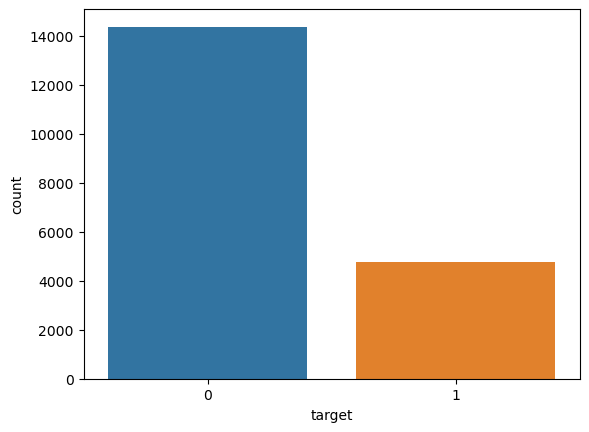

In [82]:
sns.countplot(x='target', data= df)   #not distributed

<AxesSubplot:xlabel='education_level', ylabel='count'>

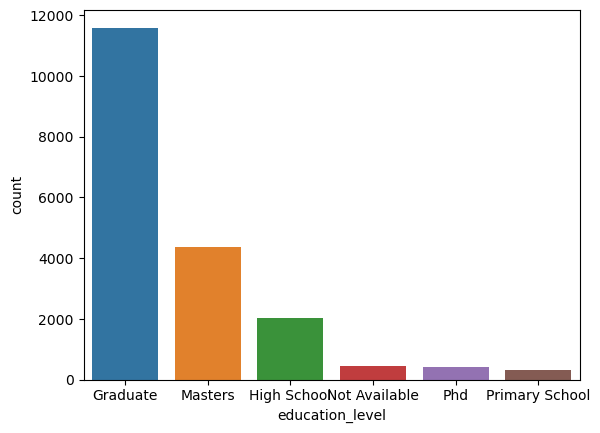

In [83]:
sns.countplot(x= 'education_level', data= df)   #label encode

<AxesSubplot:xlabel='relevent_experience', ylabel='count'>

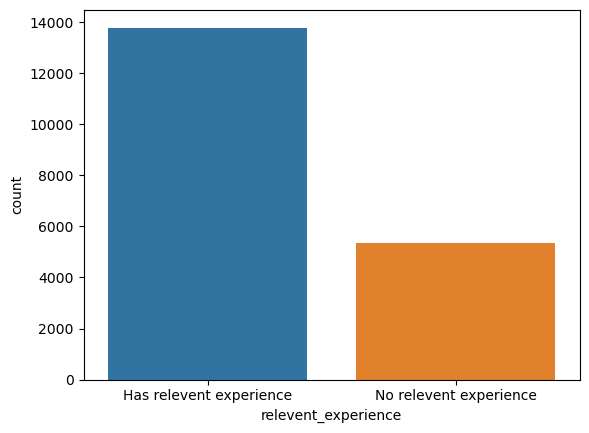

In [84]:
sns.countplot(x='relevent_experience', data= df)   #one hot encode

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

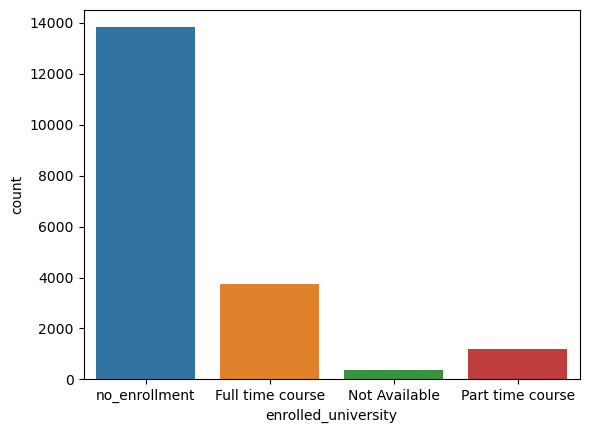

In [85]:
sns.countplot(x='enrolled_university', data= df)   #label encode

<AxesSubplot:xlabel='city_development_index', ylabel='target'>

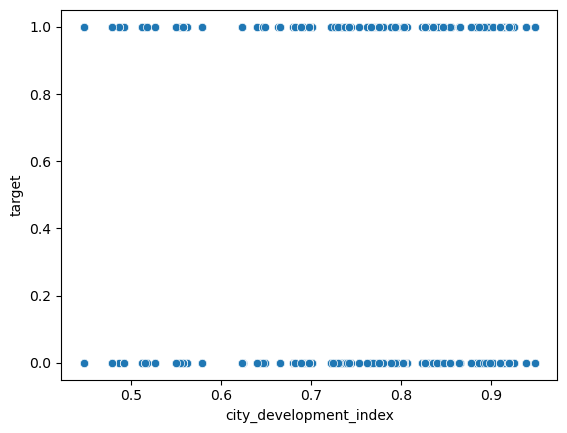

In [86]:
sns.scatterplot(x='city_development_index', y='target', data= df)  #continuous feature

### EDA

In [87]:
df.groupby(['target', 'relevent_experience']).size()  #relevent experience doesnt play much of an important role in switching carrers

target  relevent_experience    
0       Has relevent experience    10831
        No relevent experience      3550
1       Has relevent experience     2961
        No relevent experience      1816
dtype: int64

<AxesSubplot:xlabel='relevent_experience', ylabel='count'>

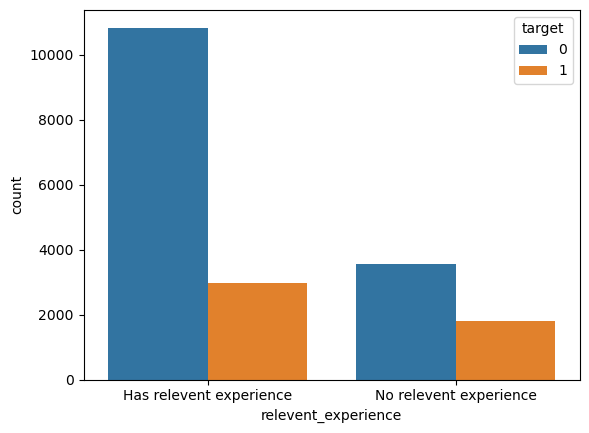

In [88]:
sns.countplot(x='relevent_experience', data= df, hue='target')

In [89]:
df.groupby(['target', 'enrolled_university']).size()   #university enrolled not very deterministic

target  enrolled_university
0       Full time course        2326
        Not Available            263
        Part time course         896
        no_enrollment          10896
1       Full time course        1431
        Not Available            123
        Part time course         302
        no_enrollment           2921
dtype: int64

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

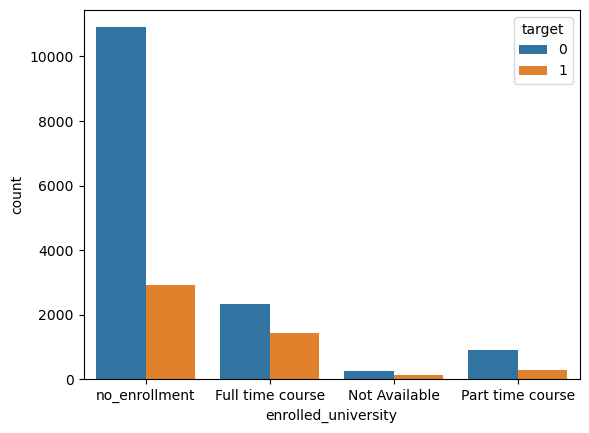

In [90]:
sns.countplot(x='enrolled_university', data= df, hue='target')

In [91]:
df.groupby(['target', 'education_level']).size()

target  education_level
0       Graduate           8353
        High School        1623
        Masters            3426
        Not Available       356
        Phd                 356
        Primary School      267
1       Graduate           3245
        High School         394
        Masters             935
        Not Available       104
        Phd                  58
        Primary School       41
dtype: int64

<AxesSubplot:xlabel='education_level', ylabel='count'>

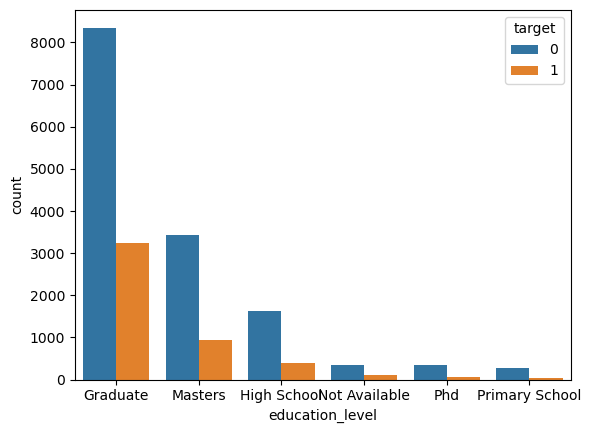

In [92]:
sns.countplot(x='education_level', data= df, hue='target')   #selection rate of graduate higher

In [93]:
df.groupby(['target', 'major_discipline']).size()

target  major_discipline
0       Arts                  200
        Business Degree       241
        Humanities            528
        No Major              168
        Not Available        2264
        Other                 279
        STEM                10701
1       Arts                   53
        Business Degree        86
        Humanities            141
        No Major               55
        Not Available         549
        Other                 102
        STEM                 3791
dtype: int64

<AxesSubplot:xlabel='major_discipline', ylabel='count'>

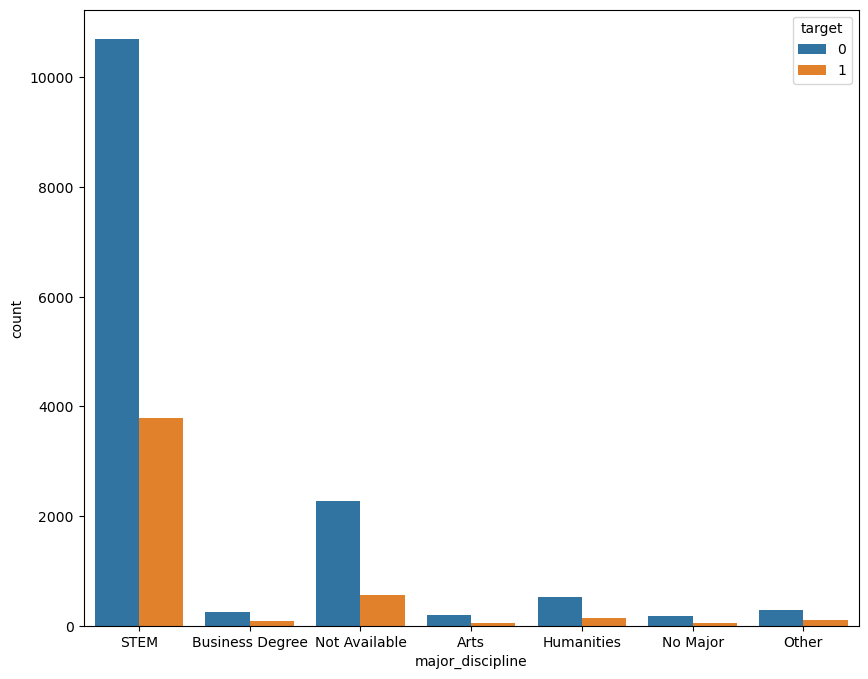

In [94]:
plt.figure(figsize=(10,8))
sns.countplot(x='major_discipline', data= df, hue='target')  #selection rate of STEM higher

<AxesSubplot:xlabel='experience', ylabel='count'>

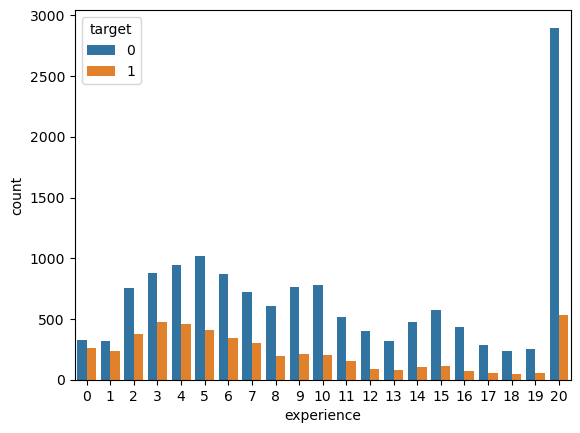

In [95]:
sns.countplot(x='experience',data= df, hue='target') 

In [96]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,Not Available,Not Available,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,Not Available,No relevent experience,Full time course,Graduate,STEM,5,Not Available,Not Available,0,83,0
3,33241,city_115,0.789,Not Available,No relevent experience,Not Available,Graduate,Business Degree,0,Not Available,Pvt Ltd,0,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,50-99,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,Not Available,Not Available,1,42,1
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,Not Available,Not Available,4,52,1
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,50-99,Pvt Ltd,4,44,0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,Not Available,0,500-999,Pvt Ltd,2,97,0


<AxesSubplot:xlabel='company_size', ylabel='count'>

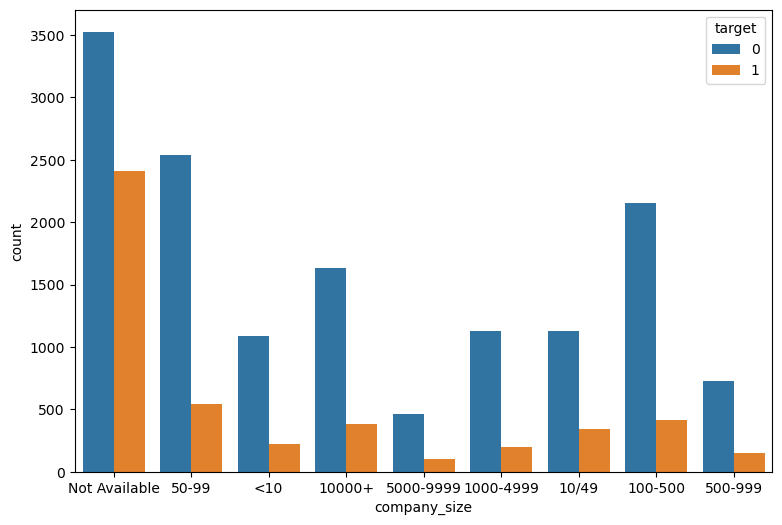

In [97]:
plt.figure(figsize=(9,6))
sns.countplot(x='company_size', data= df, hue='target')

<AxesSubplot:xlabel='company_type', ylabel='count'>

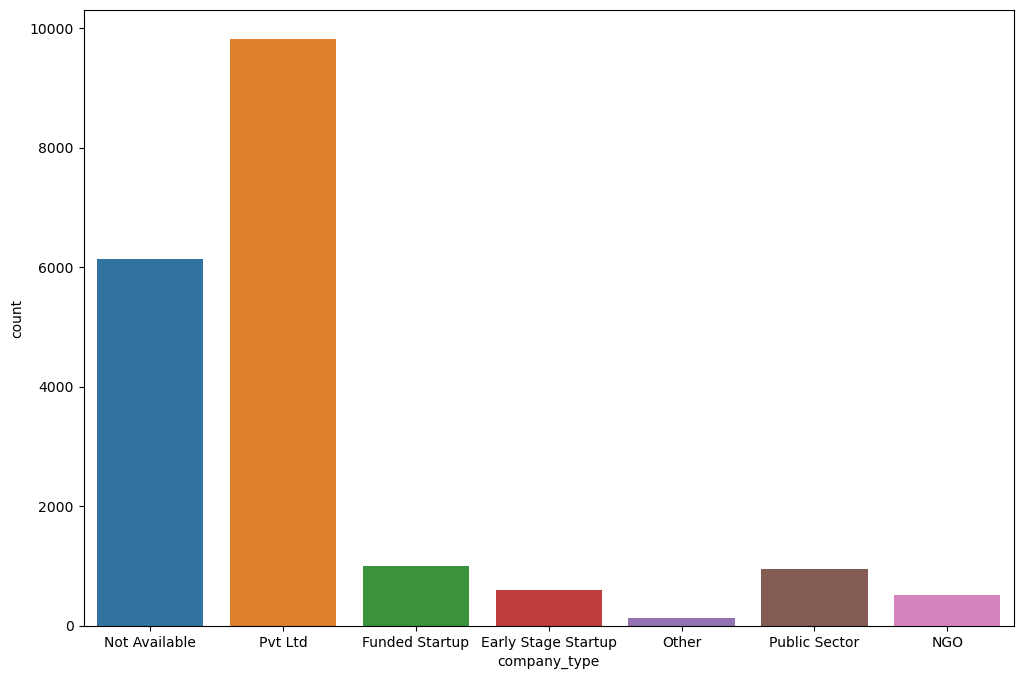

In [98]:
plt.figure(figsize=(12,8))
sns.countplot(x='company_type', data= df)  #pvt ltd has higher selection rate

<AxesSubplot:xlabel='target', ylabel='training_hours'>

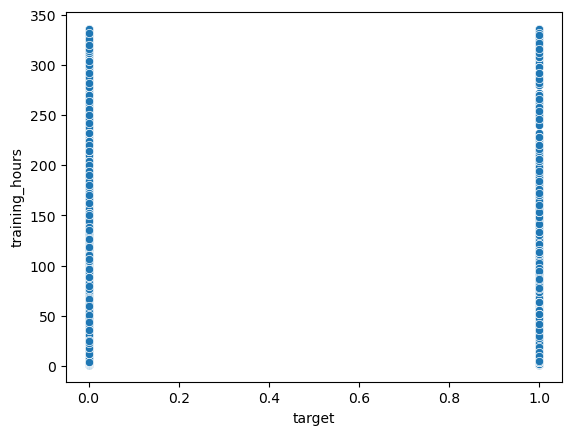

In [99]:
sns.scatterplot(x='target', y='training_hours', data= df)

#  label encoding

In [100]:
df['education_level'].unique()

array(['Graduate', 'Masters', 'High School', 'Not Available', 'Phd',
       'Primary School'], dtype=object)

In [101]:
dct={'Not Available':  0, 'Primary School' : 1, 'High School' : 2, 'Graduate': 3, 'Masters' : 4, 'Phd':5}

In [102]:
ed= []
for i in df['education_level']:
    ed.append(dct[i])
df['education_level']= ed

In [103]:
df['company_size'].unique()

array(['Not Available', '50-99', '<10', '10000+', '5000-9999',
       '1000-4999', '10/49', '100-500', '500-999'], dtype=object)

In [104]:
dct={'Not Available': 0, '<10': 1, '10/49': 2, '50-99': 3, '100-500': 4, '500-999': 5, '1000-4999': 6, '5000-9999': 7, '10000+': 8}

In [105]:
comp=[]
for i in df['company_size']:
    comp.append(dct[i])
df['company_size']= comp

In [106]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,3,STEM,20,0,Not Available,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,3,STEM,15,3,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,Not Available,No relevent experience,Full time course,3,STEM,5,0,Not Available,0,83,0
3,33241,city_115,0.789,Not Available,No relevent experience,Not Available,3,Business Degree,0,0,Pvt Ltd,0,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,4,STEM,20,3,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,3,Humanities,14,0,Not Available,1,42,1
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,3,STEM,14,0,Not Available,4,52,1
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,3,STEM,20,3,Pvt Ltd,4,44,0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,2,Not Available,0,5,Pvt Ltd,2,97,0


In [107]:
df['last_new_job'].unique()

array(['1', '>4', '0', '4', '3', '2'], dtype=object)

In [108]:
dct={'0': 0, '1': 1, '2': 2, '3': 3 , '4': 4, '>4': 5}

In [109]:
last=[]
for i in df['last_new_job']:
    last.append(dct[i])
df['last_new_job']= last

In [110]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,3,STEM,20,0,Not Available,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,3,STEM,15,3,Pvt Ltd,5,47,0
2,11561,city_21,0.624,Not Available,No relevent experience,Full time course,3,STEM,5,0,Not Available,0,83,0
3,33241,city_115,0.789,Not Available,No relevent experience,Not Available,3,Business Degree,0,0,Pvt Ltd,0,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,4,STEM,20,3,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,3,Humanities,14,0,Not Available,1,42,1
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,3,STEM,14,0,Not Available,4,52,1
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,3,STEM,20,3,Pvt Ltd,4,44,0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,2,Not Available,0,5,Pvt Ltd,2,97,0


In [111]:
temp_df=pd.get_dummies(df['company_type'])
df= pd.concat([df,temp_df], axis=1)

In [112]:
df=df.drop('company_type', axis=1)

In [113]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target,Early Stage Startup,Funded Startup,NGO,Not Available,Other,Public Sector,Pvt Ltd
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,3,STEM,20,0,1,36,1,0,0,0,1,0,0,0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,3,STEM,15,3,5,47,0,0,0,0,0,0,0,1
2,11561,city_21,0.624,Not Available,No relevent experience,Full time course,3,STEM,5,0,0,83,0,0,0,0,1,0,0,0
3,33241,city_115,0.789,Not Available,No relevent experience,Not Available,3,Business Degree,0,0,0,52,1,0,0,0,0,0,0,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,4,STEM,20,3,4,8,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,3,Humanities,14,0,1,42,1,0,0,0,1,0,0,0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,3,STEM,14,0,4,52,1,0,0,0,1,0,0,0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,3,STEM,20,3,4,44,0,0,0,0,0,0,0,1
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,2,Not Available,0,5,2,97,0,0,0,0,0,0,0,1


In [114]:
df['No relevent experience']= pd.get_dummies(df['relevent_experience'], drop_first= True)

In [115]:
df=df.drop('relevent_experience', axis=1)

In [116]:
df

,enrollee_id,city,city_development_index,gender,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target,Early Stage Startup,Funded Startup,NGO,Not Available,Other,Public Sector,Pvt Ltd,No relevent experience
0,8949,city_103,0.920,Male,no_enrollment,3,STEM,20,0,1,36,1,0,0,0,1,0,0,0,0
1,29725,city_40,0.776,Male,no_enrollment,3,STEM,15,3,5,47,0,0,0,0,0,0,0,1,1
2,11561,city_21,0.624,Not Available,Full time course,3,STEM,5,0,0,83,0,0,0,0,1,0,0,0,1
3,33241,city_115,0.789,Not Available,Not Available,3,Business Degree,0,0,0,52,1,0,0,0,0,0,0,1,1
4,666,city_162,0.767,Male,no_enrollment,4,STEM,20,3,4,8,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,no_enrollment,3,Humanities,14,0,1,42,1,0,0,0,1,0,0,0,1
19154,31398,city_103,0.920,Male,no_enrollment,3,STEM,14,0,4,52,1,0,0,0,1,0,0,0,0
19155,24576,city_103,0.920,Male,no_enrollment,3,STEM,20,3,4,44,0,0,0,0,0,0,0,1,0
19156,5756,city_65,0.802,Male,no_enrollment,2,Not Available,0,5,2,97,0,0,0,0,0,0,0,1,0


In [117]:
temp_df= pd.get_dummies(df['enrolled_university'])


In [118]:
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Not Available         386
Name: enrolled_university, dtype: int64

In [119]:
temp_df

,Full time course,Not Available,Part time course,no_enrollment
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
19153,0,0,0,1
19154,0,0,0,1
19155,0,0,0,1
19156,0,0,0,1


In [120]:
df=pd.concat([df,temp_df], axis=1)

In [121]:
df=df.drop('enrolled_university', axis=1)

In [122]:
df

,enrollee_id,city,city_development_index,gender,education_level,major_discipline,experience,company_size,last_new_job,training_hours,...,NGO,Not Available,Other,Public Sector,Pvt Ltd,No relevent experience,Full time course,Not Available,Part time course,no_enrollment
0,8949,city_103,0.920,Male,3,STEM,20,0,1,36,...,0,1,0,0,0,0,0,0,0,1
1,29725,city_40,0.776,Male,3,STEM,15,3,5,47,...,0,0,0,0,1,1,0,0,0,1
2,11561,city_21,0.624,Not Available,3,STEM,5,0,0,83,...,0,1,0,0,0,1,1,0,0,0
3,33241,city_115,0.789,Not Available,3,Business Degree,0,0,0,52,...,0,0,0,0,1,1,0,1,0,0
4,666,city_162,0.767,Male,4,STEM,20,3,4,8,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,3,Humanities,14,0,1,42,...,0,1,0,0,0,1,0,0,0,1
19154,31398,city_103,0.920,Male,3,STEM,14,0,4,52,...,0,1,0,0,0,0,0,0,0,1
19155,24576,city_103,0.920,Male,3,STEM,20,3,4,44,...,0,0,0,0,1,0,0,0,0,1
19156,5756,city_65,0.802,Male,2,Not Available,0,5,2,97,...,0,0,0,0,1,0,0,0,0,1


In [123]:
df['major_discipline'].value_counts()

STEM               14492
Not Available       2813
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [124]:
temp_df= pd.get_dummies(df['major_discipline'])
df= pd.concat([df, temp_df], axis=1)

In [125]:
df=df.drop('major_discipline', axis=1)

In [126]:
temp_df=pd.get_dummies(df['gender'])
df= pd.concat([df, temp_df], axis=1)
df=df.drop('gender', axis=1)

In [127]:
df

,enrollee_id,city,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,Early Stage Startup,...,Business Degree,Humanities,No Major,Not Available,Other,STEM,Female,Male,Not Available,Other
0,8949,city_103,0.920,3,20,0,1,36,1,0,...,0,0,0,0,0,1,0,1,0,0
1,29725,city_40,0.776,3,15,3,5,47,0,0,...,0,0,0,0,0,1,0,1,0,0
2,11561,city_21,0.624,3,5,0,0,83,0,0,...,0,0,0,0,0,1,0,0,1,0
3,33241,city_115,0.789,3,0,0,0,52,1,0,...,1,0,0,0,0,0,0,0,1,0
4,666,city_162,0.767,4,20,3,4,8,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,3,14,0,1,42,1,0,...,0,1,0,0,0,0,0,1,0,0
19154,31398,city_103,0.920,3,14,0,4,52,1,0,...,0,0,0,0,0,1,0,1,0,0
19155,24576,city_103,0.920,3,20,3,4,44,0,0,...,0,0,0,0,0,1,0,1,0,0
19156,5756,city_65,0.802,2,0,5,2,97,0,0,...,0,0,0,1,0,0,0,1,0,0


In [128]:
#label -> target

In [129]:
X= df.drop(['target', 'city'], axis=1)
y= df['target']

### train test split 

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=101)

### scale

In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
scaler= StandardScaler()

In [134]:
scaled_X_train= scaler.fit_transform(X_train)
scaled_X_test= scaler.transform(X_test)

### logistic regression model

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
log_model= LogisticRegression()

In [137]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [138]:
log_pred= log_model.predict(scaled_X_test)

In [139]:
log_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### error metrics

In [140]:
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix

In [141]:
accuracy_score(y_test, log_pred)

0.7680062630480167

C:\Users\Ritvik\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


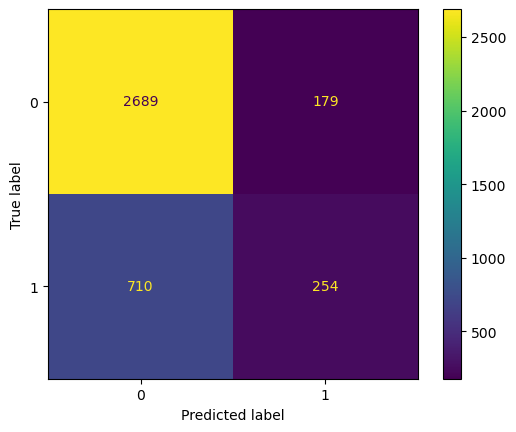

In [142]:
plot_confusion_matrix(log_model, scaled_X_test, y_test)

In [143]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      2868
           1       0.59      0.26      0.36       964

    accuracy                           0.77      3832
   macro avg       0.69      0.60      0.61      3832
weighted avg       0.74      0.77      0.73      3832



### balanced logistic model

In [144]:
log_balanced= LogisticRegression(class_weight='balanced')

In [145]:
log_balanced.fit(scaled_X_train, y_train)

LogisticRegression(class_weight='balanced')

In [146]:
log_balanced_pred= log_balanced.predict(scaled_X_test)

### error metrics

In [147]:
accuracy_score(y_test, log_balanced_pred)

0.7231210855949896

C:\Users\Ritvik\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


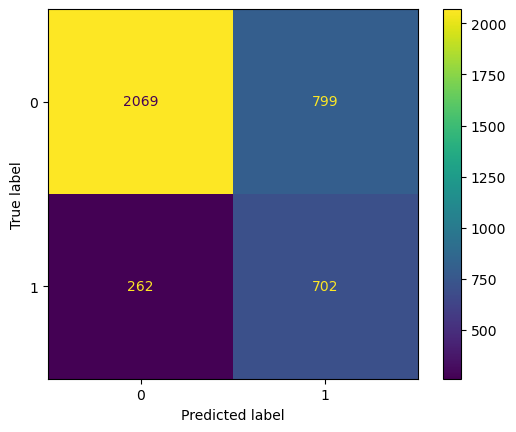

In [148]:
plot_confusion_matrix(log_balanced, scaled_X_test, y_test)

In [149]:
print(classification_report(y_test, log_balanced_pred))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      2868
           1       0.47      0.73      0.57       964

    accuracy                           0.72      3832
   macro avg       0.68      0.72      0.68      3832
weighted avg       0.78      0.72      0.74      3832



### knn model

In [150]:
from sklearn.neighbors import KNeighborsClassifier

In [151]:
base_model= KNeighborsClassifier()

In [152]:
base_model.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [153]:
base_pred= base_model.predict(scaled_X_test)

C:\Users\Ritvik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [154]:
base_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

### error metrics

In [155]:
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix

In [156]:
accuracy_score(y_test, base_pred)

0.7554801670146137

C:\Users\Ritvik\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Ritvik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


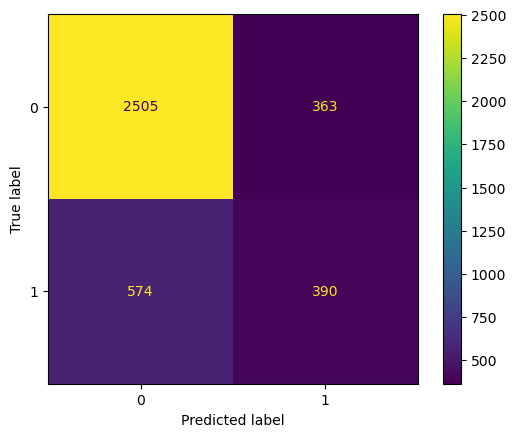

In [157]:
plot_confusion_matrix(base_model, scaled_X_test, y_test)

In [158]:
print(classification_report(y_test, base_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      2868
           1       0.52      0.40      0.45       964

    accuracy                           0.76      3832
   macro avg       0.67      0.64      0.65      3832
weighted avg       0.74      0.76      0.74      3832



### best k finding

In [159]:
error=[]
for k in tqdm(range(1,50)):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_X_train, y_train)
    pred= knn.predict(scaled_X_test)
    err= 1- accuracy_score(y_test, pred)
    error.append(err)

  0%|          | 0/49 [00:00<?, ?it/s]C:\Users\Ritvik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
  2%|▏         | 1/49 [00:01<00:57,  1.19s/it]C:\Users\Ritvik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is

 29%|██▊       | 14/49 [00:20<00:52,  1.51s/it]C:\Users\Ritvik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
 31%|███       | 15/49 [00:21<00:52,  1.54s/it]C:\Users\Ritvik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the st

 57%|█████▋    | 28/49 [00:41<00:33,  1.58s/it]C:\Users\Ritvik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
 59%|█████▉    | 29/49 [00:43<00:32,  1.61s/it]C:\Users\Ritvik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the st

 86%|████████▌ | 42/49 [01:02<00:10,  1.48s/it]C:\Users\Ritvik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
 88%|████████▊ | 43/49 [01:04<00:08,  1.48s/it]C:\Users\Ritvik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the st

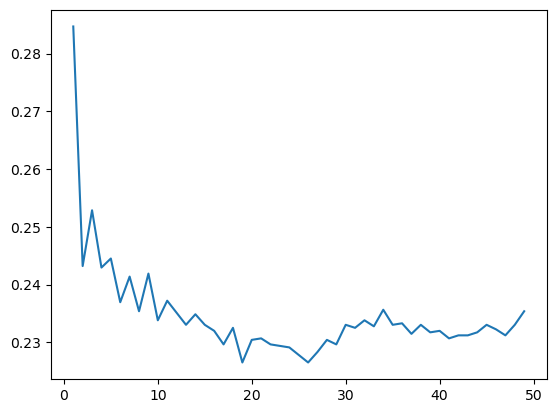

In [160]:
plt.plot(range(1,50), error)
plt.show()

In [161]:
#best k value can be obtained 10-20

In [162]:
k= np.arange(10,20)
error=[]
for i in k:
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train, y_train)
    pred= knn.predict(scaled_X_test)
    err= 1- accuracy_score(y_test, pred)
    error.append(err)

C:\Users\Ritvik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Ritvik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

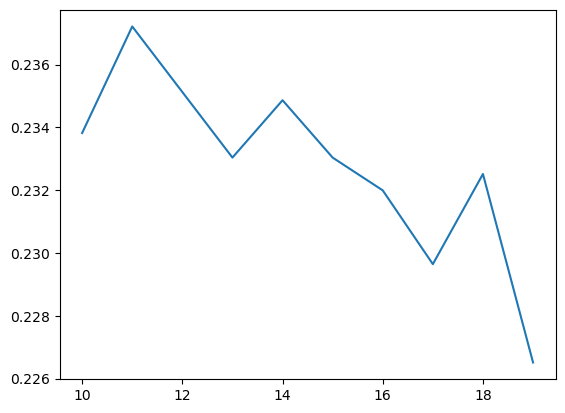

In [163]:
plt.plot(k, error)
plt.show()

In [164]:
#minimum error at 19

In [165]:
#best k= 19

In [166]:
knn_best= KNeighborsClassifier(n_neighbors=19)
knn_best.fit(scaled_X_train, y_train)
best_pred= knn_best.predict(scaled_X_test)

C:\Users\Ritvik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [167]:
best_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [168]:
accuracy_score(y_test, best_pred)

0.7734864300626305

C:\Users\Ritvik\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Ritvik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


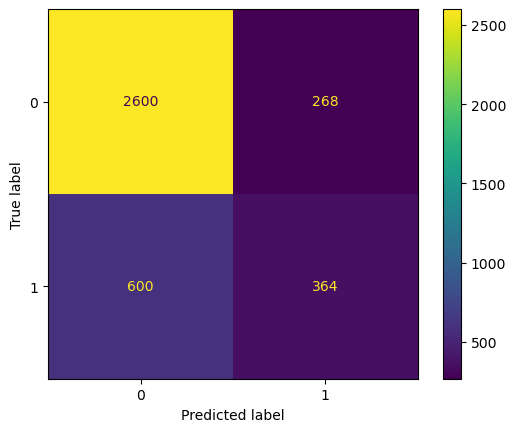

In [169]:
plot_confusion_matrix(knn_best, scaled_X_test, y_test)

In [170]:
print(classification_report(y_test, best_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      2868
           1       0.58      0.38      0.46       964

    accuracy                           0.77      3832
   macro avg       0.69      0.64      0.66      3832
weighted avg       0.75      0.77      0.76      3832



In [171]:
#knn model with neighbors= 19 gives the best metrics

### TESTING DATA PREPROCESSING

In [172]:
df= pd.read_csv('aug_test.csv')

In [173]:
df.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [174]:
df['gender']= df['gender'].fillna('Not Available')

In [175]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [176]:
from sklearn.impute import SimpleImputer

In [177]:
imputer= SimpleImputer(strategy='constant', fill_value='Not Available')

In [178]:
vals= list(imputer.fit_transform(np.array(df[df['education_level']=='High School']['major_discipline']).reshape(len(df[df['education_level']=='High School']['major_discipline']),1)).reshape(len(df[df['education_level']=='High School']['major_discipline'])))

In [179]:
index_list=list(df[df['education_level']=='High School'].index)

In [180]:
for i in tqdm(range(len(index_list))):
    df.loc[index_list[i], 'major_discipline']=vals[i]

100%|██████████| 222/222 [00:00<00:00, 13745.73it/s]


In [181]:
df.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline           90
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [182]:
df[df['education_level']=='Primary School']

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
232,8818,city_103,0.920,Not Available,Has relevent experience,no_enrollment,Primary School,NaN,7,100-500,Pvt Ltd,1,39
291,27155,city_16,0.910,Not Available,No relevent experience,NaN,Primary School,NaN,>20,NaN,NaN,never,150
326,1392,city_103,0.920,Not Available,No relevent experience,no_enrollment,Primary School,NaN,1,NaN,Pvt Ltd,never,15
366,12295,city_70,0.698,Not Available,No relevent experience,no_enrollment,Primary School,NaN,1,NaN,NaN,never,13
367,17898,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,1,NaN,NaN,never,288
411,14200,city_160,0.920,Male,Has relevent experience,no_enrollment,Primary School,NaN,>20,100-500,Pvt Ltd,1,66
517,31464,city_80,0.847,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,NaN,never,43
548,4709,city_90,0.698,Male,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,never,88
574,14353,city_149,0.689,Male,No relevent experience,Full time course,Primary School,NaN,4,<10,Early Stage Startup,1,70
702,18264,city_114,0.926,Female,Has relevent experience,no_enrollment,Primary School,NaN,>20,10/49,Pvt Ltd,>4,54


In [183]:
vals= list(imputer.fit_transform(np.array(df[df['education_level']=='Primary School']['major_discipline']).reshape(len(df[df['education_level']=='Primary School']['major_discipline']),1)).reshape(len(df[df['education_level']=='Primary School']['major_discipline'])))

In [184]:
index_list=list(df[df['education_level']=='Primary School'].index)

In [185]:
for i in tqdm(range(len(index_list))):
    df.loc[index_list[i], 'major_discipline']=vals[i]

100%|██████████| 36/36 [00:00<00:00, 12039.14it/s]


In [186]:
df.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline           54
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [187]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,Not Available,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,Not Available,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,Not Available,7,100-500,Public Sector,1,84


In [188]:
index_list=[]
index_list.append(list(df[df['relevent_experience']=='No relevent experience']['company_size'].index))


In [189]:
impute= SimpleImputer(strategy='constant', fill_value='Not Available')

In [190]:
val= list(impute.fit_transform(np.array(df[df['relevent_experience']=='No relevent experience']['company_size']).reshape(len(df[df['relevent_experience']=='No relevent experience']['company_size']), 1)).reshape(len(df[df['relevent_experience']=='No relevent experience']['company_size'])))

In [191]:
for i in tqdm(range(len(index_list[0]))):
    df.loc[index_list[0][i], 'company_size']= val[i]

100%|██████████| 605/605 [00:00<00:00, 17315.16it/s]


In [192]:
df.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline           54
experience                  5
company_size              273
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [193]:
val= list(impute.fit_transform(np.array(df[df['relevent_experience']=='No relevent experience']['company_type']).reshape(len(df[df['relevent_experience']=='No relevent experience']['company_type']), 1)).reshape(len(df[df['relevent_experience']=='No relevent experience']['company_type'])))

In [194]:
index_list=[]
index_list.append(list(df[df['relevent_experience']=='No relevent experience']['company_type'].index))


In [195]:
for i in tqdm(range(len(index_list[0]))):
    df.loc[index_list[0][i], 'company_type']= val[i]

100%|██████████| 605/605 [00:00<00:00, 16851.31it/s]


In [196]:
df.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline           54
experience                  5
company_size              273
company_type              312
last_new_job               40
training_hours              0
dtype: int64

In [197]:
impute= SimpleImputer(strategy='constant', fill_value='Not Available')

In [198]:
val= list(impute.fit_transform(np.array(df[df['education_level']=='High School']['major_discipline']).reshape(len((df[df['education_level']=='High School'])),1)).reshape(len((df[df['education_level']=='High School']))))

In [199]:
index_list=[]
index_list.append(list(df[df['education_level']=='High School']['major_discipline'].index))


In [200]:
for i in tqdm(range(len(index_list[0]))):
    df.loc[index_list[0][i], 'major_discipline']= val[i]

100%|██████████| 222/222 [00:00<00:00, 15901.08it/s]


In [201]:
df.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline           54
experience                  5
company_size              273
company_type              312
last_new_job               40
training_hours              0
dtype: int64

In [202]:
df[df['education_level']=='Primary School']

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
232,8818,city_103,0.920,Not Available,Has relevent experience,no_enrollment,Primary School,Not Available,7,100-500,Pvt Ltd,1,39
291,27155,city_16,0.910,Not Available,No relevent experience,NaN,Primary School,Not Available,>20,Not Available,Not Available,never,150
326,1392,city_103,0.920,Not Available,No relevent experience,no_enrollment,Primary School,Not Available,1,Not Available,Pvt Ltd,never,15
366,12295,city_70,0.698,Not Available,No relevent experience,no_enrollment,Primary School,Not Available,1,Not Available,Not Available,never,13
367,17898,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,Not Available,1,Not Available,Not Available,never,288
411,14200,city_160,0.920,Male,Has relevent experience,no_enrollment,Primary School,Not Available,>20,100-500,Pvt Ltd,1,66
517,31464,city_80,0.847,Male,No relevent experience,no_enrollment,Primary School,Not Available,3,Not Available,Not Available,never,43
548,4709,city_90,0.698,Male,No relevent experience,no_enrollment,Primary School,Not Available,2,Not Available,Not Available,never,88
574,14353,city_149,0.689,Male,No relevent experience,Full time course,Primary School,Not Available,4,<10,Early Stage Startup,1,70
702,18264,city_114,0.926,Female,Has relevent experience,no_enrollment,Primary School,Not Available,>20,10/49,Pvt Ltd,>4,54


In [203]:
val= list(impute.fit_transform(np.array(df[df['education_level']=='Primary School']['major_discipline']).reshape(len((df[df['education_level']=='Primary School'])),1)).reshape(len((df[df['education_level']=='Primary School']))))

In [204]:
index_list=[]
index_list.append(list(df[df['education_level']=='Primary School']['major_discipline'].index))


In [205]:
for i in tqdm(range(len(index_list[0]))):
    df.loc[index_list[0][i], 'major_discipline']= val[i]

100%|██████████| 36/36 [00:00<00:00, 12035.31it/s]


In [206]:
df.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline           54
experience                  5
company_size              273
company_type              312
last_new_job               40
training_hours              0
dtype: int64

In [207]:
df[df['education_level']=='Primary School']

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
232,8818,city_103,0.920,Not Available,Has relevent experience,no_enrollment,Primary School,Not Available,7,100-500,Pvt Ltd,1,39
291,27155,city_16,0.910,Not Available,No relevent experience,NaN,Primary School,Not Available,>20,Not Available,Not Available,never,150
326,1392,city_103,0.920,Not Available,No relevent experience,no_enrollment,Primary School,Not Available,1,Not Available,Pvt Ltd,never,15
366,12295,city_70,0.698,Not Available,No relevent experience,no_enrollment,Primary School,Not Available,1,Not Available,Not Available,never,13
367,17898,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,Not Available,1,Not Available,Not Available,never,288
411,14200,city_160,0.920,Male,Has relevent experience,no_enrollment,Primary School,Not Available,>20,100-500,Pvt Ltd,1,66
517,31464,city_80,0.847,Male,No relevent experience,no_enrollment,Primary School,Not Available,3,Not Available,Not Available,never,43
548,4709,city_90,0.698,Male,No relevent experience,no_enrollment,Primary School,Not Available,2,Not Available,Not Available,never,88
574,14353,city_149,0.689,Male,No relevent experience,Full time course,Primary School,Not Available,4,<10,Early Stage Startup,1,70
702,18264,city_114,0.926,Female,Has relevent experience,no_enrollment,Primary School,Not Available,>20,10/49,Pvt Ltd,>4,54


In [208]:
impute= SimpleImputer(strategy='constant', fill_value='Not Available')

In [209]:
val= list(impute.fit_transform(np.array(df[df['education_level']=='Primary School']['enrolled_university']).reshape(len((df[df['education_level']=='Primary School'])),1)).reshape(len((df[df['education_level']=='Primary School']))))

In [210]:
index_list=[]
index_list.append(list(df[df['education_level']=='Primary School']['enrolled_university'].index))


In [211]:
for i in tqdm(range(len(index_list[0]))):
    df.loc[index_list[0][i], 'enrolled_university']= val[i]

100%|██████████| 36/36 [00:00<00:00, 11888.43it/s]


In [212]:
df.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university        28
education_level            52
major_discipline           54
experience                  5
company_size              273
company_type              312
last_new_job               40
training_hours              0
dtype: int64

In [213]:
df[df['education_level']=='High School']

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,Not Available,<1,Not Available,Pvt Ltd,never,15
49,20768,city_90,0.698,Male,No relevent experience,Full time course,High School,Not Available,2,Not Available,Not Available,never,87
55,16917,city_103,0.920,Not Available,No relevent experience,Full time course,High School,Not Available,1,Not Available,Not Available,1,48
60,19625,city_97,0.925,Male,Has relevent experience,no_enrollment,High School,Not Available,7,50-99,Pvt Ltd,1,31
73,16230,city_103,0.920,Not Available,No relevent experience,Full time course,High School,Not Available,1,Not Available,Not Available,never,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,33225,city_138,0.836,Male,Has relevent experience,no_enrollment,High School,Not Available,14,NaN,NaN,1,42
2119,8905,city_70,0.698,Not Available,No relevent experience,Full time course,High School,Not Available,8,Not Available,Not Available,never,55
2120,9772,city_114,0.926,Male,No relevent experience,no_enrollment,High School,Not Available,5,Not Available,Not Available,never,32
2123,21339,city_21,0.624,Female,No relevent experience,Full time course,High School,Not Available,3,Not Available,Not Available,never,56


In [214]:
df.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university        28
education_level            52
major_discipline           54
experience                  5
company_size              273
company_type              312
last_new_job               40
training_hours              0
dtype: int64

In [215]:
df[df.isnull()['experience']]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
32,22849,city_116,0.743,Not Available,Has relevent experience,no_enrollment,NaN,NaN,NaN,50-99,Pvt Ltd,never,12
125,4417,city_103,0.920,Not Available,No relevent experience,no_enrollment,NaN,NaN,NaN,Not Available,Not Available,NaN,99
203,19780,city_105,0.794,Female,Has relevent experience,no_enrollment,Masters,NaN,NaN,500-999,NaN,1,53
812,11963,city_61,0.913,Female,Has relevent experience,no_enrollment,Masters,Humanities,NaN,50-99,NaN,1,24
1734,25181,city_100,0.887,Not Available,Has relevent experience,no_enrollment,Masters,STEM,NaN,10/49,Funded Startup,3,4


In [216]:
impute= SimpleImputer(strategy='constant', fill_value='Not Available')

In [217]:
val=list(impute.fit_transform(np.array(df[df['company_type']=='Not Available']['experience']).reshape(len(df[df['company_type']=='Not Available']['experience']),1)).reshape(len(df[df['company_type']=='Not Available']['experience'])))

In [218]:
index_list=list(df[df['company_type']=='Not Available']['experience'].index)

In [219]:
for i in tqdm(range(len(index_list))):
    df.loc[index_list[i], 'experience']= val[i]
    

100%|██████████| 322/322 [00:00<00:00, 16142.35it/s]


In [220]:
df.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university        28
education_level            52
major_discipline           54
experience                  4
company_size              273
company_type              312
last_new_job               40
training_hours              0
dtype: int64

In [221]:
val=list(impute.fit_transform(np.array(df[df['last_new_job']=='never']['experience']).reshape(len(df[df['last_new_job']=='never']['experience']),1)).reshape(len(df[df['last_new_job']=='never']['experience'])))

In [222]:
index_list=list(df[df['last_new_job']=='never']['experience'].index)

In [223]:
for i in tqdm(range(len(index_list))):
    df.loc[index_list[i], 'experience']= val[i]

100%|██████████| 258/258 [00:00<00:00, 16138.67it/s]


In [224]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,Not Available,<1,Not Available,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,Not Available,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,Not Available,3,Not Available,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,Not Available,7,100-500,Public Sector,1,84


In [225]:
df.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university        28
education_level            52
major_discipline           54
experience                  3
company_size              273
company_type              312
last_new_job               40
training_hours              0
dtype: int64

In [226]:
impute=SimpleImputer(strategy='constant',fill_value='never' )

In [227]:
val= list(impute.fit_transform(np.array(df[df['relevent_experience']=='No relevent experience']['last_new_job']).reshape(len(df[df['relevent_experience']=='No relevent experience']['last_new_job']), 1)).reshape(len(df[df['relevent_experience']=='No relevent experience']['last_new_job'])))

In [228]:
index_list=[]
index_list.append(list(df[df['relevent_experience']=='No relevent experience']['last_new_job'].index))


In [229]:
for i in tqdm(range(len(index_list[0]))):
    df.loc[index_list[0][i], 'last_new_job']= val[i]

100%|██████████| 605/605 [00:00<00:00, 15950.23it/s]


In [230]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,Not Available,<1,Not Available,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,Not Available,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,Not Available,3,Not Available,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,Not Available,7,100-500,Public Sector,1,84


In [231]:
df.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university        28
education_level            52
major_discipline           54
experience                  3
company_size              273
company_type              312
last_new_job               19
training_hours              0
dtype: int64

In [232]:
df['education_level']= df['education_level'].fillna('Not Available')

In [233]:
df['major_discipline']= df['major_discipline'].fillna('Not Available')

In [234]:
df.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university        28
education_level             0
major_discipline            0
experience                  3
company_size              273
company_type              312
last_new_job               19
training_hours              0
dtype: int64

In [235]:
df['enrolled_university']= df['enrolled_university'].fillna('Not Available')

In [236]:
df.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university         0
education_level             0
major_discipline            0
experience                  3
company_size              273
company_type              312
last_new_job               19
training_hours              0
dtype: int64

In [237]:
df['company_size']= df['company_size'].fillna('Not Available')

In [238]:
df['company_type']= df['company_type'].fillna('Not Available')

In [239]:
df.isnull().sum()

enrollee_id                0
city                       0
city_development_index     0
gender                     0
relevent_experience        0
enrolled_university        0
education_level            0
major_discipline           0
experience                 3
company_size               0
company_type               0
last_new_job              19
training_hours             0
dtype: int64

In [240]:
df['last_new_job']= df['last_new_job'].fillna('never')

In [241]:
df['experience']= df['experience'].fillna('<1')

In [242]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,Not Available,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,Not Available,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,Not Available,<1,Not Available,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,Not Available,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,Not Available,Not Available,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,Not Available,3,Not Available,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,Not Available,7,100-500,Public Sector,1,84


In [243]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [244]:
exp=[]
for i in tqdm(df['experience']):
    if('<' in i):
        exp.append(int(i[1:])-1)
    elif('>' in i):
        exp.append(int(i[1: ]))
    elif('Not Available'== i):
        exp.append(i)
    else:
        exp.append(int(i))
df['experience']= exp

100%|██████████| 2129/2129 [00:00<00:00, 1067631.90it/s]


In [245]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,Not Available,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,Not Available,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,Not Available,0,Not Available,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,Not Available,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,Not Available,Not Available,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,Not Available,3,Not Available,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,Not Available,7,100-500,Public Sector,1,84


In [246]:
last=[]
for i in df['last_new_job']:
    if('never' in i):
        last.append(str(0))
    else:
        last.append(i)
df['last_new_job']= last        

In [247]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,Not Available,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,Not Available,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,Not Available,0,Not Available,Pvt Ltd,0,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,Not Available,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,Not Available,Not Available,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,Not Available,3,Not Available,Pvt Ltd,0,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,Not Available,7,100-500,Public Sector,1,84


In [248]:
exp=[]
for i in df['experience']:
    if('Not Available' == i):
        exp.append(0)
    else:
        exp.append(int(i))
df['experience']= exp

In [249]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,Not Available,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,Not Available,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,Not Available,0,Not Available,Pvt Ltd,0,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,Not Available,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,Not Available,Not Available,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,Not Available,3,Not Available,Pvt Ltd,0,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,Not Available,7,100-500,Public Sector,1,84


saving preprocessed test csv

In [250]:
#df.to_csv('final_test.csv', index= False)

#  label encoding

In [251]:
df['education_level'].unique()

array(['Graduate', 'High School', 'Masters', 'Not Available', 'Phd',
       'Primary School'], dtype=object)

In [252]:
dct={'Not Available':  0, 'Primary School' : 1, 'High School' : 2, 'Graduate': 3, 'Masters' : 4, 'Phd':5}

In [253]:
ed= []
for i in df['education_level']:
    ed.append(dct[i])
df['education_level']= ed

In [254]:
df['company_size'].unique()

array(['<10', 'Not Available', '10/49', '10000+', '100-500', '50-99',
       '1000-4999', '500-999', '5000-9999'], dtype=object)

In [255]:
dct={'Not Available': 0, '<10': 1, '10/49': 2, '50-99': 3, '100-500': 4, '500-999': 5, '1000-4999': 6, '5000-9999': 7, '10000+': 8}

In [256]:
comp=[]
for i in df['company_size']:
    comp.append(dct[i])
df['company_size']= comp

In [257]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,3,STEM,9,1,Not Available,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,3,STEM,5,0,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,2,Not Available,0,0,Pvt Ltd,0,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,4,STEM,11,2,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,3,STEM,20,8,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,3,Humanities,16,0,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,4,STEM,18,0,Not Available,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,1,Not Available,3,0,Pvt Ltd,0,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,2,Not Available,7,4,Public Sector,1,84


In [258]:
df['last_new_job'].unique()

array(['1', '0', '>4', '2', '4', '3'], dtype=object)

In [259]:
dct={'0': 0, '1': 1, '2': 2, '3': 3 , '4': 4, '>4': 5}

In [260]:
last=[]
for i in df['last_new_job']:
    last.append(dct[i])
df['last_new_job']= last

In [261]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,3,STEM,9,1,Not Available,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,3,STEM,5,0,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,2,Not Available,0,0,Pvt Ltd,0,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,4,STEM,11,2,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,3,STEM,20,8,Pvt Ltd,5,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,3,Humanities,16,0,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,4,STEM,18,0,Not Available,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,1,Not Available,3,0,Pvt Ltd,0,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,2,Not Available,7,4,Public Sector,1,84


In [262]:
temp_df=pd.get_dummies(df['company_type'])
df= pd.concat([df,temp_df], axis=1)

In [263]:
df=df.drop('company_type', axis=1)

In [264]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,Early Stage Startup,Funded Startup,NGO,Not Available,Other,Public Sector,Pvt Ltd
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,3,STEM,9,1,1,21,0,0,0,1,0,0,0
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,3,STEM,5,0,1,98,0,0,0,0,0,0,1
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,2,Not Available,0,0,0,15,0,0,0,0,0,0,1
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,4,STEM,11,2,1,39,0,0,0,0,0,0,1
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,3,STEM,20,8,5,72,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,3,Humanities,16,0,4,15,0,0,0,0,0,1,0
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,4,STEM,18,0,2,30,0,0,0,1,0,0,0
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,1,Not Available,3,0,0,18,0,0,0,0,0,0,1
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,2,Not Available,7,4,1,84,0,0,0,0,0,1,0


In [265]:
df['No relevent experience']= pd.get_dummies(df['relevent_experience'], drop_first= True)

In [266]:
df=df.drop('relevent_experience', axis=1)

In [267]:
df

,enrollee_id,city,city_development_index,gender,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,Early Stage Startup,Funded Startup,NGO,Not Available,Other,Public Sector,Pvt Ltd,No relevent experience
0,32403,city_41,0.827,Male,Full time course,3,STEM,9,1,1,21,0,0,0,1,0,0,0,0
1,9858,city_103,0.920,Female,no_enrollment,3,STEM,5,0,1,98,0,0,0,0,0,0,1,0
2,31806,city_21,0.624,Male,no_enrollment,2,Not Available,0,0,0,15,0,0,0,0,0,0,1,1
3,27385,city_13,0.827,Male,no_enrollment,4,STEM,11,2,1,39,0,0,0,0,0,0,1,0
4,27724,city_103,0.920,Male,no_enrollment,3,STEM,20,8,5,72,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,no_enrollment,3,Humanities,16,0,4,15,0,0,0,0,0,1,0,1
2125,195,city_136,0.897,Male,no_enrollment,4,STEM,18,0,2,30,0,0,0,1,0,0,0,0
2126,31762,city_100,0.887,Male,no_enrollment,1,Not Available,3,0,0,18,0,0,0,0,0,0,1,1
2127,7873,city_102,0.804,Male,Full time course,2,Not Available,7,4,1,84,0,0,0,0,0,1,0,0


In [268]:
temp_df= pd.get_dummies(df['enrolled_university'])


In [269]:
df['enrolled_university'].value_counts()

no_enrollment       1519
Full time course     435
Part time course     144
Not Available         31
Name: enrolled_university, dtype: int64

In [270]:
temp_df

,Full time course,Not Available,Part time course,no_enrollment
0,1,0,0,0
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
2124,0,0,0,1
2125,0,0,0,1
2126,0,0,0,1
2127,1,0,0,0


In [271]:
df=pd.concat([df,temp_df], axis=1)

In [272]:
df=df.drop('enrolled_university', axis=1)

In [273]:
df

,enrollee_id,city,city_development_index,gender,education_level,major_discipline,experience,company_size,last_new_job,training_hours,...,NGO,Not Available,Other,Public Sector,Pvt Ltd,No relevent experience,Full time course,Not Available,Part time course,no_enrollment
0,32403,city_41,0.827,Male,3,STEM,9,1,1,21,...,0,1,0,0,0,0,1,0,0,0
1,9858,city_103,0.920,Female,3,STEM,5,0,1,98,...,0,0,0,0,1,0,0,0,0,1
2,31806,city_21,0.624,Male,2,Not Available,0,0,0,15,...,0,0,0,0,1,1,0,0,0,1
3,27385,city_13,0.827,Male,4,STEM,11,2,1,39,...,0,0,0,0,1,0,0,0,0,1
4,27724,city_103,0.920,Male,3,STEM,20,8,5,72,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,3,Humanities,16,0,4,15,...,0,0,0,1,0,1,0,0,0,1
2125,195,city_136,0.897,Male,4,STEM,18,0,2,30,...,0,1,0,0,0,0,0,0,0,1
2126,31762,city_100,0.887,Male,1,Not Available,3,0,0,18,...,0,0,0,0,1,1,0,0,0,1
2127,7873,city_102,0.804,Male,2,Not Available,7,4,1,84,...,0,0,0,1,0,0,1,0,0,0


In [274]:
df['major_discipline'].value_counts()

STEM               1621
Not Available       312
Humanities           80
Other                40
Business Degree      37
No Major             22
Arts                 17
Name: major_discipline, dtype: int64

In [275]:
temp_df= pd.get_dummies(df['major_discipline'])
df= pd.concat([df, temp_df], axis=1)

In [276]:
df=df.drop('major_discipline', axis=1)

In [277]:
temp_df=pd.get_dummies(df['gender'])
df= pd.concat([df, temp_df], axis=1)
df=df.drop('gender', axis=1)

In [278]:
df

,enrollee_id,city,city_development_index,education_level,experience,company_size,last_new_job,training_hours,Early Stage Startup,Funded Startup,...,Business Degree,Humanities,No Major,Not Available,Other,STEM,Female,Male,Not Available,Other
0,32403,city_41,0.827,3,9,1,1,21,0,0,...,0,0,0,0,0,1,0,1,0,0
1,9858,city_103,0.920,3,5,0,1,98,0,0,...,0,0,0,0,0,1,1,0,0,0
2,31806,city_21,0.624,2,0,0,0,15,0,0,...,0,0,0,1,0,0,0,1,0,0
3,27385,city_13,0.827,4,11,2,1,39,0,0,...,0,0,0,0,0,1,0,1,0,0
4,27724,city_103,0.920,3,20,8,5,72,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,3,16,0,4,15,0,0,...,0,1,0,0,0,0,0,1,0,0
2125,195,city_136,0.897,4,18,0,2,30,0,0,...,0,0,0,0,0,1,0,1,0,0
2126,31762,city_100,0.887,1,3,0,0,18,0,0,...,0,0,0,1,0,0,0,1,0,0
2127,7873,city_102,0.804,2,7,4,1,84,0,0,...,0,0,0,1,0,0,0,1,0,0


In [279]:
X_test= df.drop('city', axis=1)

### using knn_best to predict values

In [280]:
from sklearn.preprocessing import StandardScaler

In [281]:
scaled_X_test= scaler.transform(X_test)

In [282]:
predicted_val=knn_best.predict(scaled_X_test)

C:\Users\Ritvik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [283]:
predicted_val

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)